## Question 11

When do Redditors respond to hate speech?

#### Operationalized questions: 
* What is the time gap between the original submission and the comments with toxic speech?

* What is the time gap between the first comment with toxic speech and the next comment with toxic speech?

#### Hypothesis:
The time gap between the first hateful or offensive comment and the next hateful or offensive comment will be shorter than the gap between the original submission and the first hateful or offensive comment.

#### Results:
Based on the results, we found that our hypothesis was correct. Given the high number of outliers in response time for both conditions, we chose to look at the median time gap instead of the mean time gap. For initial toxic comments responding to submissions, the median time gap was 3 hours, 49 seconds, whereas the median time gap for second toxic comments responding to first toxic comments was 1 hour, 13 minutes, resulting in a difference of around 2 hours and 36 minutes between the two conditions. When examining the response rate for both conditions after 5 minutes, 30 minutes, 1 hour, and 24 hours, we find that initial toxic comments receive a higher number of responses at each time metric. We can therefore determine that, based on our sampled dataset, toxic comments are posted slightly faster when responding to an initial toxic comment, as opposed to a submission.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

#### Read in the comments and submissions data

In [ ]:
c = pd.read_csv('../data/processed/comments.csv')
s = pd.read_csv('../data/processed/submissions.csv')

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3228: DtypeWarning: Columns (5,6,7,8,9,11,12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Create a time difference dataframe

This dataframe allows us to merge statistics for all toxic comments and submissions, as well as the TimeDelta and total second differences between a submission and the toxic comments posted to that submission.

Note: Due to this cell taking a long time to run, there is an option to import the csv file from our data folder. 

In [ ]:
def create_time_difference_df(import_csv_for_speed=True):

    comms_df = c[['davidson_label','created_utc','created','submission_id','subreddit', 'subreddit_id','body']]
    comms_df = comms_df[comms_df.davidson_label != 2]
    comms_df = comms_df.rename(columns={'body':'comments_body'})

    subs_df = s[['created_utc', 'created','id','subreddit', 'title']]
    subs_df = subs_df.rename(columns={'id':'submission_id', 'title':'sub_body'})

    merged_df = pd.merge(subs_df, comms_df, how='left', on='submission_id')
    merged_df['created_x'] = pd.to_datetime(merged_df['created_x'])
    merged_df['created_y'] = pd.to_datetime(merged_df['created_y'])

    merged_df['t_difference_sub_com'] = merged_df['created_y'] - merged_df['created_x']
    merged_df = merged_df.rename(columns={'created_x':'created_sub'})
    merged_df = merged_df[['created_sub','t_difference_sub_com','submission_id', 'sub_body', 'comments_body', 'created_y']]      
    merged_df = merged_df[merged_df.t_difference_sub_com.isnull() != True]
    
    if import_csv_for_speed == False:
        for i in tqdm(merged_df.submission_id.unique()):
            merged_df.loc[merged_df['submission_id']==i,'t_difference_com_com'] = merged_df[merged_df.submission_id == i].sort_values('created_y').created_y.diff()
    
    else:
        merged_df = pd.read_csv('../data/viz/time_difference_df.csv').set_index('Unnamed: 0')
        merged_df['created_sub'] = pd.to_datetime(merged_df['created_sub'])
        merged_df['created_y'] = pd.to_datetime(merged_df['created_y'])
        merged_df['t_difference_sub_com'] = pd.to_timedelta(merged_df['t_difference_sub_com'])
        merged_df['t_difference_com_com'] = pd.to_timedelta(merged_df['t_difference_com_com'])


    merged_df['t_difference_sub_com_total_seconds'] = [i.total_seconds() for i in merged_df['t_difference_sub_com']]
    merged_df['t_difference_com_com_total_seconds'] = [i.total_seconds() for i in merged_df['t_difference_com_com']]
    
    merged_df = merged_df[['submission_id', 'sub_body', 'created_sub','t_difference_sub_com',
                           't_difference_sub_com_total_seconds','comments_body','created_y',
                           't_difference_com_com','t_difference_com_com_total_seconds']]
    merged_df = merged_df.rename(columns={'created_y':'created_comment'})
    merged_df = merged_df.drop(merged_df[merged_df.t_difference_sub_com_total_seconds < 0].index)
    
    return merged_df
    
time_difference_df = create_time_difference_df(import_csv_for_speed=True)    


In [ ]:
time_difference_df.head()

,submission_id,sub_body,created_sub,t_difference_sub_com,t_difference_sub_com_total_seconds,comments_body,created_comment,t_difference_com_com,t_difference_com_com_total_seconds
Unnamed: 0,,,,,,,,,
1,rsvx9y,🎊Happy New Years SLUTS 🍆,2021-12-31 15:11:45,0 days 09:12:25,33145.0,CummyBot2000 I'm your slut and you can fuck me...,2022-01-01 00:24:10,NaT,NaN
2,rsvx9y,🎊Happy New Years SLUTS 🍆,2021-12-31 15:11:45,0 days 17:33:12,63192.0,CummyBot2000 I'm your slut and you can fuck me...,2022-01-01 08:44:57,0 days 08:20:47,30047.0
5,rsqn77,"Dear Diary… It’s me, RuPaul, and I know who Al...",2021-12-31 10:00:15,0 days 15:51:27,57087.0,MADDYS ENTRANCE LOOK BEING GUY FIERI IS SO CUNT,2022-01-01 01:51:42,NaT,NaN
6,rsqn77,"Dear Diary… It’s me, RuPaul, and I know who Al...",2021-12-31 10:00:15,0 days 16:04:27,57867.0,You’re the queen of making cast lists that are...,2022-01-01 02:04:42,0 days 00:13:00,780.0
7,rsqn77,"Dear Diary… It’s me, RuPaul, and I know who Al...",2021-12-31 10:00:15,0 days 21:02:13,75733.0,People will still manage to shit on the season...,2022-01-01 07:02:28,0 days 04:57:46,17866.0


#### Create the first comment comparison dataframe

This cell will use the previous dataframe to extract the time gap in seconds between the initial toxic comment posted to a submission, as well as the time gap in seconds between the first toxic comment and the following toxic comment.

Note: Similarly to the cell above, this cell takes a long time to run, so there is an option to import the csv file from our data folder. 

In [ ]:
def first_comment_comparison(import_csv_for_speed=True, print_stats=True):
    if import_csv_for_speed == False:
        sub_df = time_difference_df[['created_sub','submission_id','t_difference_sub_com']]
        com_df = time_difference_df[['created_comment','submission_id','t_difference_com_com']]
        com_df = com_df[com_df.t_difference_com_com.isnull()==False]

        sub_id = []
        sub_created = []
        sub_response = []
        for i in tqdm(sub_df.submission_id.unique()):
            sub_id.append(i)
            sub_created.append(sub_df[sub_df.submission_id == i].created_sub.iloc[0])
            sub_response.append(sub_df[sub_df.submission_id == i].t_difference_sub_com.iloc[0])

        sub = pd.DataFrame()
        sub['id'] = pd.Series(sub_id)
        sub['sub_created'] = pd.Series(sub_created)
        sub['sub_response'] = pd.Series(sub_response)

        com_id = []
        com_created = []
        com_response = []
        for i in tqdm(com_df.submission_id.unique()):
            com_id.append(i)
            com_created.append(com_df[com_df.submission_id == i].created_comment.iloc[0])
            com_response.append(com_df[com_df.submission_id == i].t_difference_com_com.iloc[0])

        com = pd.DataFrame()
        com['id'] = pd.Series(com_id)
        com['com_created'] = pd.Series(com_created)
        com['com_response'] = pd.Series(com_response)

        merged_df = pd.merge(sub, com, how='left', on='id')

        merged_df['sub_response_sec'] = [i.total_seconds() for i in merged_df['sub_response']]
        merged_df['com_response_sec'] = [i.total_seconds() for i in merged_df['com_response']]
    
    else:
        merged_df = pd.read_csv('../data/viz/first_comment_comparison.csv')
        merged_df['sub_created'] = pd.to_datetime(merged_df['sub_created'])
        merged_df['com_created'] = pd.to_datetime(merged_df['com_created'])
        merged_df['sub_response'] = pd.to_timedelta(merged_df['sub_response'])
        merged_df['com_response'] = pd.to_timedelta(merged_df['com_response'])
    
    if print_stats == True:
        print('Time Gap Between Original Submission and First Toxic Comment')
        print(merged_df.sub_response.describe())
        print('\n')
        print('Median Time Gap: '+str(merged_df.sub_response.median()))
        print('\n')
        print('Time Gap Between First Toxic Comment and Next Toxic Comment')
        print(merged_df.com_response.describe())
        print('\n')
        print('Median Time Gap: '+str(merged_df.com_response.median()))
    else:
        print('Median Time Gap Between Original Submission and First Toxic Comment: '+str(merged_df.sub_response.median()))
        print('Median Time Gap Between First Toxic Comment and Next Toxic Comment: '+str(merged_df.com_response.median()))
    
    return merged_df

first_comment_comparison_df = first_comment_comparison(import_csv_for_speed=True, print_stats=True)


Time Gap Between Original Submission and First Toxic Comment
count                         71075
mean      8 days 03:29:27.486176574
std      83 days 03:36:16.055567076
min                 0 days 00:00:00
25%                 0 days 00:45:07
50%                 0 days 03:49:09
75%                 0 days 11:32:37
max              4410 days 07:43:28
Name: sub_response, dtype: object


Median Time Gap: 0 days 03:49:09


Time Gap Between First Toxic Comment and Next Toxic Comment
count                        14694
mean     0 days 07:46:41.032258064
std      1 days 07:00:52.814727238
min                0 days 00:00:01
25%                0 days 00:12:50
50%         0 days 01:13:21.500000
75%         0 days 04:56:47.250000
max               27 days 20:14:19
Name: com_response, dtype: object


Median Time Gap: 0 days 01:13:21.500000


In [ ]:
first_comment_comparison_df.head()

,Unnamed: 0,id,sub_created,sub_response,com_created,com_response,sub_response_sec,com_response_sec
0,0,rsvx9y,2021-12-31 15:11:45,0 days 09:12:25,2022-01-01 08:44:57,0 days 08:20:47,33145.0,30047.0
1,1,rsqn77,2021-12-31 10:00:15,0 days 15:51:27,2022-01-01 02:04:42,0 days 00:13:00,57087.0,780.0
2,2,rsuzze,2021-12-31 14:25:39,0 days 10:50:05,2022-01-01 01:15:44,0 days 00:02:17,39005.0,137.0
3,3,rspri0,2021-12-31 09:00:11,0 days 19:47:34,NaT,NaT,71254.0,NaN
4,4,rsy1dy,2021-12-31 16:51:51,0 days 11:38:40,2022-01-01 05:17:45,0 days 00:47:14,41920.0,2834.0


#### Visualize how submissions and initial comments receive responses

This cell uses the first_comment_comparison_df to visualize the differences between the first toxic comments posted to submissions and the toxic comments posted to initial comments at various time intervals including 5 minutes, 30 minutes, 1 hour, and 24 hours. 

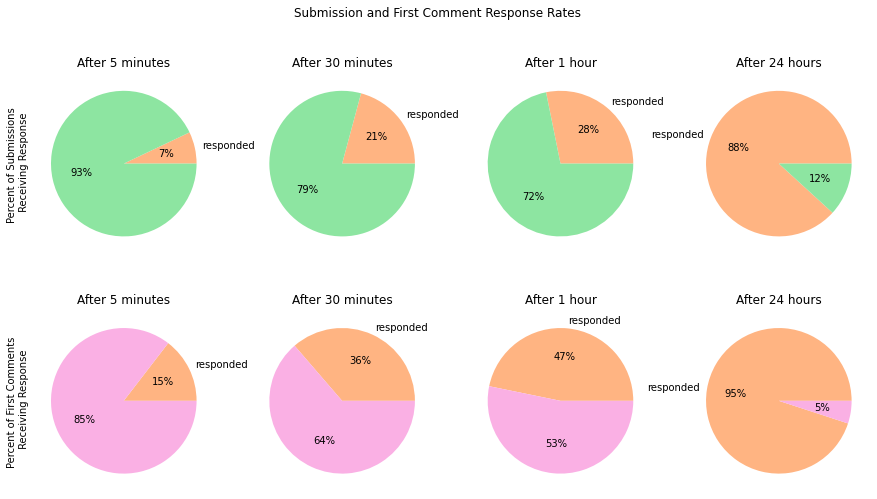

In [ ]:
def make_sub_to_com_charts():
    
    com_dropped_df = first_comment_comparison_df[first_comment_comparison_df['com_response_sec'].isnull()==False]

    df = pd.DataFrame({
    'minute_1':[len(first_comment_comparison_df[first_comment_comparison_df['sub_response_sec'] <= 60.0])/len(first_comment_comparison_df),
               len(com_dropped_df[com_dropped_df['com_response_sec'] <= 60.0])/len(com_dropped_df)],
    'minute_5' : [len(first_comment_comparison_df[first_comment_comparison_df['sub_response_sec'] <= 300.0])/len(first_comment_comparison_df),
                  len(com_dropped_df[com_dropped_df['com_response_sec'] <= 300.0])/len(com_dropped_df)],
    'minute_10' : [len(first_comment_comparison_df[first_comment_comparison_df['sub_response_sec'] <= 600.0])/len(first_comment_comparison_df),
                   len(com_dropped_df[com_dropped_df['com_response_sec'] <= 600.0])/len(com_dropped_df)],
    'minute_15' : [len(first_comment_comparison_df[first_comment_comparison_df['sub_response_sec'] <= 900.0])/len(first_comment_comparison_df),
                  len(com_dropped_df[com_dropped_df['com_response_sec'] <= 900.0])/len(com_dropped_df)],
    'minute_30' : [len(first_comment_comparison_df[first_comment_comparison_df['sub_response_sec'] <= 1800.0])/len(first_comment_comparison_df),
                   len(com_dropped_df[com_dropped_df['com_response_sec'] <= 1800.0])/len(com_dropped_df)],
    'hour_1' : [len(first_comment_comparison_df[first_comment_comparison_df['sub_response_sec'] <= 3600.0])/len(first_comment_comparison_df),
                len(com_dropped_df[com_dropped_df['com_response_sec'] <= 3600.0])/len(com_dropped_df)],
    'hour_6' : [len(first_comment_comparison_df[first_comment_comparison_df['sub_response_sec'] <= 21600.0])/len(first_comment_comparison_df),
                len(com_dropped_df[com_dropped_df['com_response_sec'] <= 21600.0])/len(com_dropped_df)],
    'hour_12' : [len(first_comment_comparison_df[first_comment_comparison_df['sub_response_sec'] <= 43200.0])/len(first_comment_comparison_df),
                 len(com_dropped_df[com_dropped_df['com_response_sec'] <= 43200.0])/len(com_dropped_df)],
    'hour_24' : [len(first_comment_comparison_df[first_comment_comparison_df['sub_response_sec'] <= 86400.0])/len(first_comment_comparison_df),
                 len(com_dropped_df[com_dropped_df['com_response_sec'] <= 86400.0])/len(com_dropped_df)],
    })

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    colors = sns.color_palette('pastel')

    axes[0,0].pie([df.iloc[0].minute_5, 1-df.iloc[0].minute_5], labels=['responded',''], colors=[colors[1],colors[2]], autopct='%.0f%%')
    axes[0,0].set_title('After 5 minutes')
    axes[0,0].set_ylabel('Percent of Submissions \n Receiving Response')
    axes[0,1].pie([df.iloc[0].minute_30, 1-df.iloc[0].minute_30], labels=['responded',''], colors=[colors[1],colors[2]], autopct='%.0f%%')
    axes[0,1].set_title('After 30 minutes')
    axes[0,2].pie([df.iloc[0].hour_1, 1-df.iloc[0].hour_1], labels=['responded',''], colors=[colors[1],colors[2]], autopct='%.0f%%')
    axes[0,2].set_title('After 1 hour')
    axes[0,3].pie([df.iloc[0].hour_24, 1-df.iloc[0].hour_24], labels=['responded',''], colors=[colors[1],colors[2]], autopct='%.0f%%')
    axes[0,3].set_title('After 24 hours')

    axes[1,0].pie([df.iloc[1].minute_5, 1-df.iloc[1].minute_5], labels=['responded',''], colors=[colors[1],colors[6]], autopct='%.0f%%')
    axes[1,0].set_title('After 5 minutes')
    axes[1,0].set_ylabel('Percent of First Comments \n Receiving Response')
    axes[1,1].pie([df.iloc[1].minute_30, 1-df.iloc[1].minute_30], labels=['responded',''], colors=[colors[1],colors[6]], autopct='%.0f%%')
    axes[1,1].set_title('After 30 minutes')
    axes[1,2].pie([df.iloc[1].hour_1, 1-df.iloc[1].hour_1], labels=['responded',''], colors=[colors[1],colors[6]], autopct='%.0f%%')
    axes[1,2].set_title('After 1 hour')
    axes[1,3].pie([df.iloc[1].hour_24, 1-df.iloc[1].hour_24], labels=['responded',''], colors=[colors[1],colors[6]], autopct='%.0f%%')
    axes[1,3].set_title('After 24 hours')

    plt.suptitle('Submission and First Comment Response Rates')
    plt.show()

make_sub_to_com_charts()
    

## What Time of Day to Redditors Post?
#### Supplementary Question

This cell takes the previous dataframes to visualize the hours of the day during which Redditors post submissions and toxic comments, as well as the initial toxic comment of a submission and the toxic comment following an initial comment.

The results show a similar outcome for all four conditions with the majority of activity occurring from the late afternoon to evening, roughly between 5pm and 11pm.

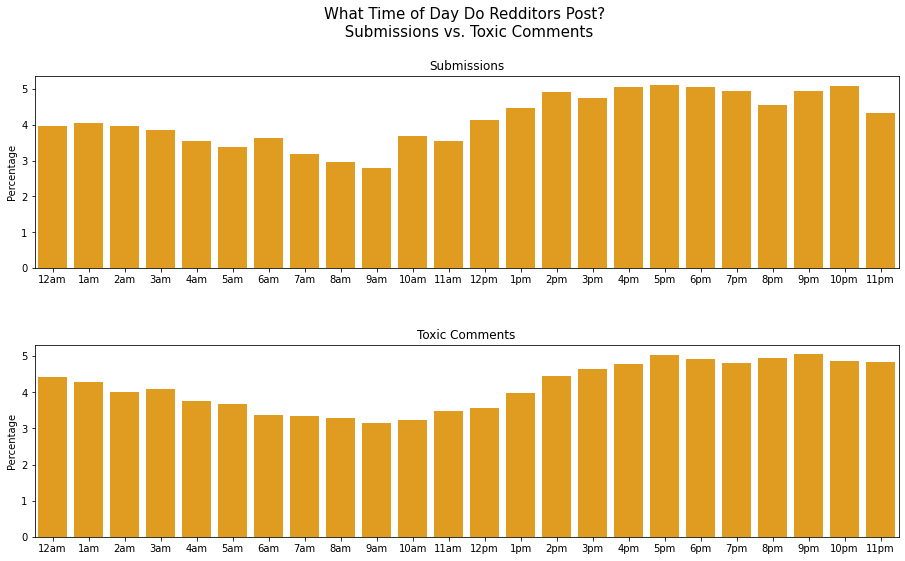

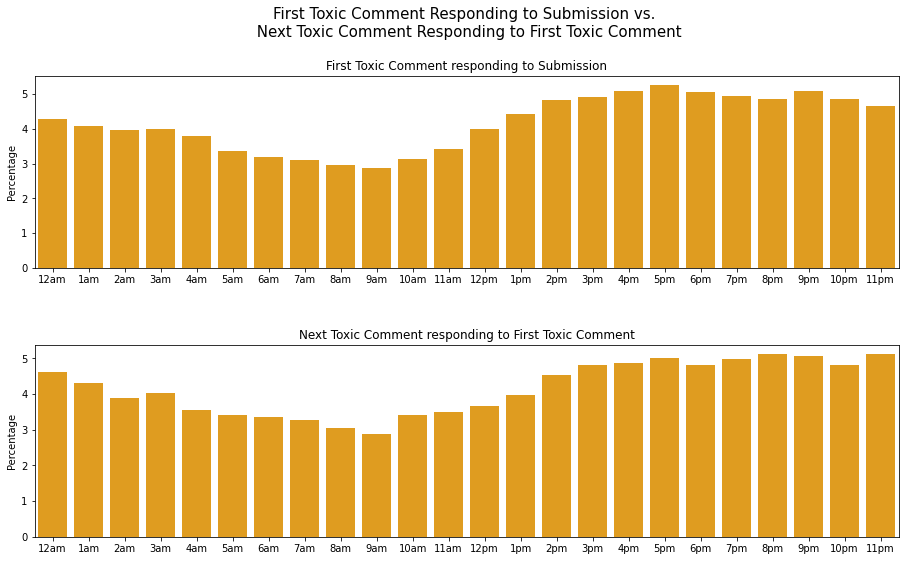

In [ ]:
def hours_of_day_plots():
    import warnings
    warnings.filterwarnings('ignore')
    
    hours_df = time_difference_df.copy()
    
    hours_df['sub_hour'] = hours_df.created_sub.dt.hour.astype(str)
    hours_df['com_hour'] = hours_df.created_comment.dt.hour.astype(str)
    
    sub_hour_dict = {}
    for t in hours_df.sub_hour.unique():
        sub_hour_dict[t] = len(hours_df[hours_df.sub_hour == t])/len(hours_df)
    sub_hour_dict = dict(sorted(sub_hour_dict.items(), key=lambda x:x[1], reverse=True))
    
    com_hour_dict = {}
    for t in hours_df.com_hour.unique():
        com_hour_dict[t] = len(hours_df[hours_df.com_hour == t])/len(hours_df)
    com_hour_dict = dict(sorted(com_hour_dict.items(), key=lambda x:x[1], reverse=True))
    
    first_post_hours_df = first_comment_comparison_df.copy()
    first_post_hours_df_cut = first_post_hours_df.dropna()
    
    first_post_hours_df['sub_hour'] = first_post_hours_df.sub_created.dt.hour.astype(str)
    first_post_hours_df_cut['com_hour'] = first_post_hours_df.com_created.dt.hour.astype(str)
    first_post_hours_df_cut['com_hour'] = [i[:-2] for i in first_post_hours_df_cut['com_hour']]

    com_on_sub_hour_dict = {}
    for t in first_post_hours_df.sub_hour.unique():
        com_on_sub_hour_dict[t] = len(first_post_hours_df[first_post_hours_df.sub_hour == t])/len(first_post_hours_df)
    com_on_sub_hour_dict = dict(sorted(com_on_sub_hour_dict.items(), key=lambda x:x[1], reverse=True))

#     first_post_hours_df = first_post_hours_df.dropna()
    com_on_com_hour_dict = {}
    for t in first_post_hours_df_cut.com_hour.unique():
        com_on_com_hour_dict[t] = len(first_post_hours_df_cut[first_post_hours_df_cut.com_hour == t])/len(first_post_hours_df_cut)
    com_on_com_hour_dict = dict(sorted(com_on_com_hour_dict.items(), key=lambda x:x[1], reverse=True))

    
    time_hour_df = pd.DataFrame()
    time_hour_df['submissions'] = pd.Series(sub_hour_dict)
    time_hour_df['comments'] = pd.Series(com_hour_dict)
    time_hour_df = round(time_hour_df *100,2)
    time_hour_df=time_hour_df.reset_index()
    time_hour_df=time_hour_df.rename(columns={'index':'hour'})
    
    first_post_time_hour_df = pd.DataFrame()
    first_post_time_hour_df['com_on_sub'] = pd.Series(com_on_sub_hour_dict)
    first_post_time_hour_df['com_on_com'] = pd.Series(com_on_com_hour_dict)

    first_post_time_hour_df = round(first_post_time_hour_df *100,2)
    first_post_time_hour_df=first_post_time_hour_df.reset_index()
    first_post_time_hour_df=first_post_time_hour_df.rename(columns={'index':'hour'})

    h_list = list(time_hour_df.hour.astype(int))
    for i in range(len(h_list)):
        if h_list[i] == 0:
            h_list[i] = '12am'
        elif h_list[i] < 12:
            h_list[i] = str(h_list[i])+'am'
        elif h_list[i] > 12:
            h_list[i] = str(h_list[i] - 12)+'pm'
        else:
            h_list[i] = str(h_list[i])+'pm'    
    
    time_hour_df['am_pm'] = h_list
    time_hour_df['hour'] = time_hour_df.hour.astype(int)
    
    h_list = list(first_post_time_hour_df.hour.astype(int))
    for i in range(len(h_list)):
        if h_list[i] == 0:
            h_list[i] = '12am'
        elif h_list[i] < 12:
            h_list[i] = str(h_list[i])+'am'
        elif h_list[i] > 12:
            h_list[i] = str(h_list[i] - 12)+'pm'
        else:
            h_list[i] = str(h_list[i])+'pm'   
    
    first_post_time_hour_df['am_pm'] = h_list
    first_post_time_hour_df['hour'] = first_post_time_hour_df.hour.astype(int)

    fig, axes = plt.subplots(2, 1, figsize=(15, 8))
    fig.suptitle('What Time of Day Do Redditors Post? \n Submissions vs. Toxic Comments', y=1.02, size=15)
    
    color = sns.color_palette('Oranges')
    
    sns.barplot(ax=axes[0], data=time_hour_df.sort_values('hour'), x='am_pm',y='submissions', color='orange').set(
        xlabel='',ylabel='Percentage',title='Submissions')

    sns.barplot(ax=axes[1], data=time_hour_df.sort_values('hour'), x='am_pm',y='comments', color='orange').set(
        xlabel='',ylabel='Percentage',title='Toxic Comments')

    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)

    fig, axes = plt.subplots(2, 1, figsize=(15, 8))
    fig.suptitle('First Toxic Comment Responding to Submission vs. \n Next Toxic Comment Responding to First Toxic Comment',y=1.02,  size=15)

    sns.barplot(ax=axes[0], data=first_post_time_hour_df.sort_values('hour'), x='am_pm',y='com_on_sub', color='orange').set(
        xlabel='',ylabel='Percentage',title='First Toxic Comment responding to Submission')

    sns.barplot(ax=axes[1], data=first_post_time_hour_df.sort_values('hour'), x='am_pm',y='com_on_com', color='orange').set(
        xlabel='',ylabel='Percentage',title='Next Toxic Comment responding to First Toxic Comment')

    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)

hours_of_day_plots()


## Question 15

How often and when are toxic comments removed or deleted?

#### Operationalized Questions:
* What percentage of toxic comments were removed by Reddit?

* What percentage of toxic comments were deleted by the comments' authors?

* What is the time gap between when the comment was created and when it was deleted?

#### Hypothesis:
* There will not be a significant difference between the percentage of comments classified as hateful that are removed by Reddit moderators and the percentage of comments classified as offensive that are removed by Reddit moderators.

* The percentage of comments that are deleted by the original authors will be very low.

#### Results:
Based on our analysis, we found that the percentage of toxic comments removed by Reddit in the month of January was around 5% of the total toxic comments, with 7% of comments classified at hate speech removed, and 5% of comments classified at offensive speech removed. The results were similar for toxic comments deleted by the author (6% total, 6% hate, 6% offensive). What was noticeably different, however, was the rate at which toxic comments were removed or deleted. Of the toxic comments removed by Reddit, 84% of hate comments and 74% of offensive comments were removed within 24 hours. Of the toxic comments deleted by the author, only 41% of hate comments and 40% of offensive comments were deleted in the same 24 hour period. 

We used Welch's t-test to determine if there is a significant difference in how the classification of a comment is related to removal or deletion. For both tests, the p-value for the calculated test statistic is lower than the 5% significance level, leading us to reject the null hypothesis, and determine that there appears to be a relationship between classification as hate or offensive and removal or deletion.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

#### Read in the comments data

In [ ]:
c = pd.read_csv('../data/processed/comments.csv')

#### Removed vs deleted toxic comments

This cell compiles the necessary data to visualize the differences between hate, offensive and total toxic comment removal and deletion.

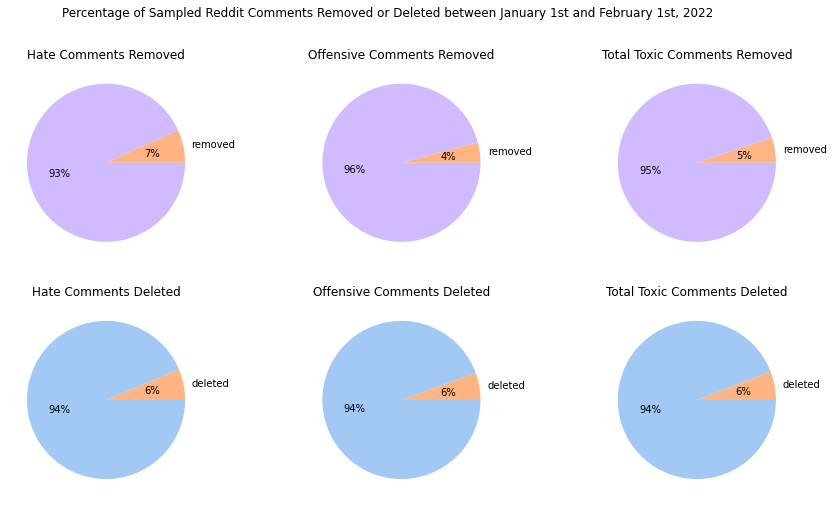

In [ ]:
hate_df = c[c.davidson_label == 0]
offensive_df = c[c.davidson_label == 1]
total_toxic_df = c[(c.davidson_label == 0) | (c.davidson_label == 1)]

hate_removed = len(hate_df[hate_df.updated_body == '[removed]'])/len(hate_df)
offensive_removed = len(offensive_df[offensive_df.updated_body == '[removed]'])/len(offensive_df)
total_toxic_removed = len(total_toxic_df[total_toxic_df.updated_body == '[removed]'])/len(total_toxic_df)

hate_deleted = len(hate_df[hate_df.updated_body == '[deleted]'])/len(hate_df)
offensive_deleted = len(offensive_df[offensive_df.updated_body == '[deleted]'])/len(offensive_df)
total_toxic_deleted = len(total_toxic_df[total_toxic_df.updated_body == '[deleted]'])/len(total_toxic_df)


fig, axes = plt.subplots(2, 3, figsize=(15, 8))
colors = sns.color_palette('pastel')

axes[0,0].pie([hate_removed, 1-hate_removed], labels=['removed',''], colors=[colors[1],colors[4]], autopct='%.0f%%')
axes[0,0].set_title('Hate Comments Removed')
axes[0,1].pie([offensive_removed, 1-offensive_removed], labels=['removed',''], colors=[colors[1],colors[4]], autopct='%.0f%%')
axes[0,1].set_title('Offensive Comments Removed')
axes[0,2].pie([total_toxic_removed, 1-total_toxic_removed], labels=['removed',''], colors=[colors[1],colors[4]], autopct='%.0f%%')
axes[0,2].set_title('Total Toxic Comments Removed')

axes[1,0].pie([hate_deleted, 1-hate_deleted], labels=['deleted',''], colors=[colors[1],colors[0]], autopct='%.0f%%')
axes[1,0].set_title('Hate Comments Deleted')
axes[1,1].pie([offensive_deleted, 1-offensive_deleted], labels=['deleted',''], colors=[colors[1],colors[0]], autopct='%.0f%%')
axes[1,1].set_title('Offensive Comments Deleted')
axes[1,2].pie([total_toxic_deleted, 1-total_toxic_deleted], labels=['deleted',''], colors=[colors[1],colors[0]], autopct='%.0f%%')
axes[1,2].set_title('Total Toxic Comments Deleted')

plt.suptitle('Percentage of Sampled Reddit Comments Removed or Deleted between January 1st and February 1st, 2022')
plt.show()


#### When are toxic comments removed or deleted?

The following cells seek to visualize how quickly hate and offensive comments are removed or deleted. The statistics give insight into the percentage of removed or deleted comments at various time intervals, and we can visualize the rate of removal and deletion for both types of comments after 5 minutes, 30 minutes, 1 hour and 24 hours. 

In [ ]:
def get_removed_deleted_stats(type_of_speech, removed_or_deleted, print_stats=False):
    time_series_df = c[['davidson_label','body','updated_body','created','modified']]
    if type_of_speech == 'hate':
        labeled_time_series_df = time_series_df[time_series_df.davidson_label == 0]
    elif type_of_speech == 'offensive':
        labeled_time_series_df = time_series_df[time_series_df.davidson_label == 1]
    elif type_of_speech == 'neither':
        labeled_time_series_df = time_series_df[time_series_df.davidson_label == 2]

    modified_df = labeled_time_series_df[labeled_time_series_df.updated_body == '['+removed_or_deleted+']']
    modified_df = modified_df[modified_df.modified.isnull() == False]
    
    modified_df['created'] = pd.to_datetime(modified_df['created'])
    modified_df['modified'] = pd.to_datetime(modified_df['modified'])
    modified_df['days_since_removed'] = modified_df.modified - modified_df.created

    seconds=[]
    for i in modified_df['days_since_removed']:
        seconds.append(i.total_seconds())
    modified_df['days_since_removed_total_seconds'] = seconds

    if print_stats == True:
        print(modified_df['days_since_removed'].describe())
        print('\n')
        print(str('{:,.0%}'.format(len(modified_df[modified_df['days_since_removed_total_seconds'] <= 60.0])/len(modified_df))) + ' of ' + removed_or_deleted + ' '+ type_of_speech + ' comments were '+removed_or_deleted+' in the first minute.')
        print(str('{:,.0%}'.format(len(modified_df[modified_df['days_since_removed_total_seconds'] <= 300.0])/len(modified_df))) + ' of ' + removed_or_deleted + ' '+ type_of_speech + ' comments were '+removed_or_deleted+' in the first 5 minutes.')
        print(str('{:,.0%}'.format(len(modified_df[modified_df['days_since_removed_total_seconds'] <= 600.0])/len(modified_df))) + ' of ' + removed_or_deleted + ' '+ type_of_speech + ' comments were '+removed_or_deleted+' in the first 10 minutes.')
        print(str('{:,.0%}'.format(len(modified_df[modified_df['days_since_removed_total_seconds'] <= 900.0])/len(modified_df))) + ' of ' + removed_or_deleted + ' '+ type_of_speech + ' comments were '+removed_or_deleted+' in the first 15 minutes.')
        print(str('{:,.0%}'.format(len(modified_df[modified_df['days_since_removed_total_seconds'] <= 1800.0])/len(modified_df))) + ' of ' + removed_or_deleted + ' '+ type_of_speech + ' comments were '+removed_or_deleted+' in the first 30 minutes.')
        print(str('{:,.0%}'.format(len(modified_df[modified_df['days_since_removed_total_seconds'] <= 3600.0])/len(modified_df))) + ' of ' + removed_or_deleted + ' '+ type_of_speech + ' comments were '+removed_or_deleted+' in the first hour.')
        print(str('{:,.0%}'.format(len(modified_df[modified_df['days_since_removed_total_seconds'] <= 21600.0])/len(modified_df))) + ' of ' + removed_or_deleted + ' '+ type_of_speech + ' comments were '+removed_or_deleted+' in the first 6 hours.')
        print(str('{:,.0%}'.format(len(modified_df[modified_df['days_since_removed_total_seconds'] <= 43200.0])/len(modified_df))) + ' of ' + removed_or_deleted + ' '+ type_of_speech + ' comments were '+removed_or_deleted+' in the first 12 hours.')
        print(str('{:,.0%}'.format(len(modified_df[modified_df['days_since_removed_total_seconds'] <= 86400.0])/len(modified_df))) + ' of ' + removed_or_deleted + ' '+ type_of_speech + ' comments were '+removed_or_deleted+' in the first 24 hours.')
        print('\n')
    
    time_df = pd.DataFrame(index=[type_of_speech])
    time_df['variable'] = removed_or_deleted
    time_df['count'] = modified_df['days_since_removed'].count()
    time_df['min'] = modified_df['days_since_removed'].min()
    time_df['mean'] = modified_df['days_since_removed'].mean()
    time_df['median'] = modified_df['days_since_removed'].median()
    time_df['std'] = modified_df['days_since_removed'].std()
    time_df['25%'] = modified_df['days_since_removed'].quantile(q=.25)
    time_df['50%'] = modified_df['days_since_removed'].quantile(q=.50)
    time_df['75%'] = modified_df['days_since_removed'].quantile(q=.75)
    time_df['max'] = modified_df['days_since_removed'].max()
    time_df['minute_1'] = len(modified_df[modified_df['days_since_removed_total_seconds'] <= 60.0])/len(modified_df)
    time_df['minute_5'] = len(modified_df[modified_df['days_since_removed_total_seconds'] <= 300.0])/len(modified_df)
    time_df['minute_10'] = len(modified_df[modified_df['days_since_removed_total_seconds'] <= 600.0])/len(modified_df) 
    time_df['minute_15'] = len(modified_df[modified_df['days_since_removed_total_seconds'] <= 900.0])/len(modified_df)
    time_df['minute_30'] = len(modified_df[modified_df['days_since_removed_total_seconds'] <= 1800.0])/len(modified_df)
    time_df['hour_1'] = len(modified_df[modified_df['days_since_removed_total_seconds'] <= 3600.0])/len(modified_df)
    time_df['hour_6'] = len(modified_df[modified_df['days_since_removed_total_seconds'] <= 21600.0])/len(modified_df)
    time_df['hour_12'] = len(modified_df[modified_df['days_since_removed_total_seconds'] <= 43200.0])/len(modified_df)
    time_df['hour_24'] = len(modified_df[modified_df['days_since_removed_total_seconds'] <= 86400.0])/len(modified_df)
    
    return time_df


def append_dfs():
    speech = ['hate', 'offensive', 'neither']
    variables = ['removed', 'deleted']
    
    df = pd.DataFrame()
    
    for s in speech:
        for v in variables:
            df = df.append(get_removed_deleted_stats(s, v))
            
    return df.reset_index().rename(columns={'index':'speech'})

In [ ]:
get_removed_deleted_stats('hate', 'removed', print_stats=True)

count                          188
mean     2 days 07:20:07.473404255
std      7 days 05:31:09.220146573
min                0 days 00:00:30
25%         0 days 00:06:26.500000
50%         0 days 00:37:44.500000
75%         0 days 12:35:37.500000
max               39 days 16:17:04
Name: days_since_removed, dtype: object


1% of removed hate comments were removed in the first minute.
16% of removed hate comments were removed in the first 5 minutes.
36% of removed hate comments were removed in the first 10 minutes.
43% of removed hate comments were removed in the first 15 minutes.
47% of removed hate comments were removed in the first 30 minutes.
56% of removed hate comments were removed in the first hour.
65% of removed hate comments were removed in the first 6 hours.
74% of removed hate comments were removed in the first 12 hours.
84% of removed hate comments were removed in the first 24 hours.




,variable,count,min,mean,median,std,25%,50%,75%,max,minute_1,minute_5,minute_10,minute_15,minute_30,hour_1,hour_6,hour_12,hour_24
hate,removed,188,0 days 00:00:30,2 days 07:20:07.473404255,0 days 00:37:44.500000,7 days 05:31:09.220146573,0 days 00:06:26.500000,0 days 00:37:44.500000,0 days 12:35:37.500000,39 days 16:17:04,0.010638,0.159574,0.361702,0.425532,0.473404,0.558511,0.654255,0.739362,0.835106


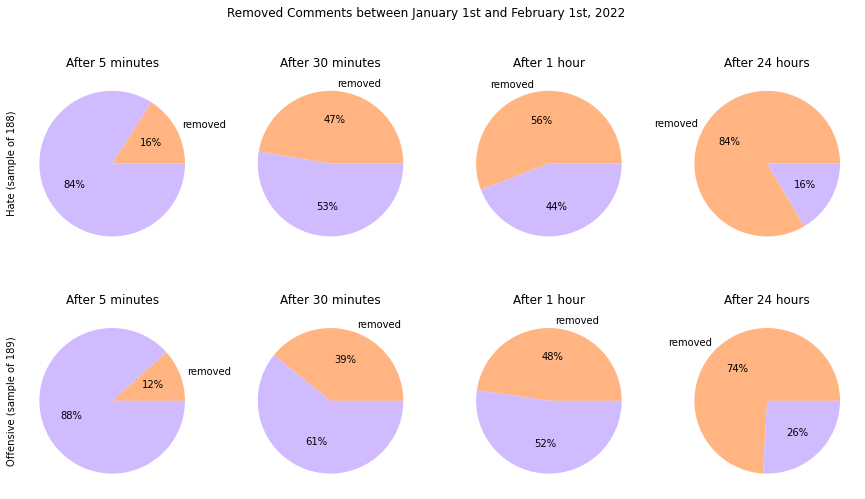

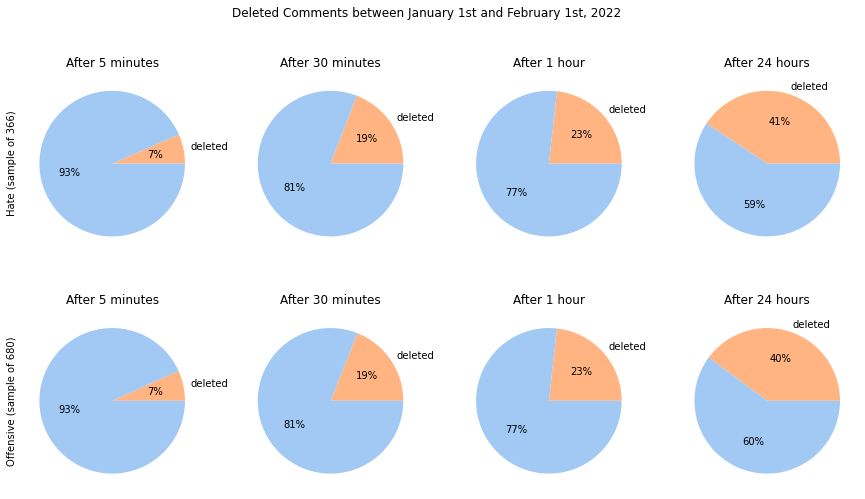

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
colors = sns.color_palette('pastel')

axes[0,0].pie([append_dfs().iloc[0].minute_5, 1-append_dfs().iloc[0].minute_5], labels=['removed',''], colors=[colors[1],colors[4]], autopct='%.0f%%')
axes[0,0].set_title('After 5 minutes')
axes[0,0].set_ylabel('Hate (sample of 188)')
axes[0,1].pie([append_dfs().iloc[0].minute_30, 1-append_dfs().iloc[0].minute_30], labels=['removed',''], colors=[colors[1],colors[4]], autopct='%.0f%%')
axes[0,1].set_title('After 30 minutes')
axes[0,2].pie([append_dfs().iloc[0].hour_1, 1-append_dfs().iloc[0].hour_1], labels=['removed',''], colors=[colors[1],colors[4]], autopct='%.0f%%')
axes[0,2].set_title('After 1 hour')
axes[0,3].pie([append_dfs().iloc[0].hour_24, 1-append_dfs().iloc[0].hour_24], labels=['removed',''], colors=[colors[1],colors[4]], autopct='%.0f%%')
axes[0,3].set_title('After 24 hours')

axes[1,0].pie([append_dfs().iloc[2].minute_5, 1-append_dfs().iloc[2].minute_5], labels=['removed',''], colors=[colors[1],colors[4]], autopct='%.0f%%')
axes[1,0].set_title('After 5 minutes')
axes[1,0].set_ylabel('Offensive (sample of 189)')
axes[1,1].pie([append_dfs().iloc[2].minute_30, 1-append_dfs().iloc[2].minute_30], labels=['removed',''], colors=[colors[1],colors[4]], autopct='%.0f%%')
axes[1,1].set_title('After 30 minutes')
axes[1,2].pie([append_dfs().iloc[2].hour_1, 1-append_dfs().iloc[2].hour_1], labels=['removed',''], colors=[colors[1],colors[4]], autopct='%.0f%%')
axes[1,2].set_title('After 1 hour')
axes[1,3].pie([append_dfs().iloc[2].hour_24, 1-append_dfs().iloc[2].hour_24], labels=['removed',''], colors=[colors[1],colors[4]], autopct='%.0f%%')
axes[1,3].set_title('After 24 hours')

plt.suptitle('Removed Comments between January 1st and February 1st, 2022')
plt.show()

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
colors = sns.color_palette('pastel')

axes[0,0].pie([append_dfs().iloc[1].minute_5, 1-append_dfs().iloc[1].minute_5], labels=['deleted',''], colors=[colors[1],colors[0]], autopct='%.0f%%')
axes[0,0].set_title('After 5 minutes')
axes[0,0].set_ylabel('Hate (sample of 366)')
axes[0,1].pie([append_dfs().iloc[1].minute_30, 1-append_dfs().iloc[1].minute_30], labels=['deleted',''], colors=[colors[1],colors[0]], autopct='%.0f%%')
axes[0,1].set_title('After 30 minutes')
axes[0,2].pie([append_dfs().iloc[1].hour_1, 1-append_dfs().iloc[1].hour_1], labels=['deleted',''], colors=[colors[1],colors[0]], autopct='%.0f%%')
axes[0,2].set_title('After 1 hour')
axes[0,3].pie([append_dfs().iloc[1].hour_24, 1-append_dfs().iloc[1].hour_24], labels=['deleted',''], colors=[colors[1],colors[0]], autopct='%.0f%%')
axes[0,3].set_title('After 24 hours')

axes[1,0].pie([append_dfs().iloc[3].minute_5, 1-append_dfs().iloc[3].minute_5], labels=['deleted',''], colors=[colors[1],colors[0]], autopct='%.0f%%')
axes[1,0].set_title('After 5 minutes')
axes[1,0].set_ylabel('Offensive (sample of 680)')
axes[1,1].pie([append_dfs().iloc[3].minute_30, 1-append_dfs().iloc[3].minute_30], labels=['deleted',''], colors=[colors[1],colors[0]], autopct='%.0f%%')
axes[1,1].set_title('After 30 minutes')
axes[1,2].pie([append_dfs().iloc[3].hour_1, 1-append_dfs().iloc[3].hour_1], labels=['deleted',''], colors=[colors[1],colors[0]], autopct='%.0f%%')
axes[1,2].set_title('After 1 hour')
axes[1,3].pie([append_dfs().iloc[3].hour_24, 1-append_dfs().iloc[3].hour_24], labels=['deleted',''], colors=[colors[1],colors[0]], autopct='%.0f%%')
axes[1,3].set_title('After 24 hours')

plt.suptitle('Deleted Comments between January 1st and February 1st, 2022')
plt.show()

#### Removal and deletion test statistics

Finally, we use Welch's t-test to compare the means between removed hate and offensive comments and deleted hate and offensive comments to determine if there is a significant difference in how the classification of a comment is related to its removal or deletion. 

In [ ]:
def collect_removed_comments_test_statistics(dataset_1, dataset_2, alpha=0.05): 
    ttest_df = pd.DataFrame(columns=['variable','t-statistic','p-value','H0','variance'])
    
    variables = ['removed', 'deleted']
    ttest_df['variable'] = variables

    for variable in variables:
        ttest_x=dataset_1[variable]
        ttest_y=dataset_2[variable]
        
        if np.var(ttest_x) != np.var(ttest_y):
            ttest_df.loc[ttest_df['variable']==variable,'variance'] = 'unequal'
            ttest = ttest_ind(ttest_x, ttest_y, nan_policy='omit', equal_var=False)
            ttest_df.loc[ttest_df['variable']==variable,'t-statistic'] = ttest[0]
            ttest_df.loc[ttest_df['variable']==variable,'p-value'] = ttest[1]
            if ttest[1] > alpha:
                ttest_df.loc[ttest_df['variable']==variable,'H0'] = 'fail to reject'
            else:
                ttest_df.loc[ttest_df['variable']==variable,'H0'] = 'reject'
        else:
            ttest_df.loc[ttest_df['variable']==variable,'variance'] = 'equal'
            ttest = ttest_ind(ttest_x, ttest_y, nan_policy='omit')
            ttest_df.loc[ttest_df['variable']==variable,'t-statistic'] = ttest[0]
            ttest_df.loc[ttest_df['variable']==variable,'p-value'] = ttest[1]
            if ttest[1] > alpha:
                ttest_df.loc[ttest_df['variable']==variable,'H0'] = 'fail to reject'
            else:
                ttest_df.loc[ttest_df['variable']==variable,'H0'] = 'reject'
    
    return ttest_df


In [ ]:
modified_stats_df = c.copy()
modified_stats_df.loc[modified_stats_df.updated_body == '[removed]','removed'] = 1
modified_stats_df.loc[modified_stats_df.updated_body != '[removed]','removed'] = 0
modified_stats_df.loc[modified_stats_df.updated_body == '[deleted]','deleted'] = 1
modified_stats_df.loc[modified_stats_df.updated_body != '[deleted]','deleted'] = 0
modified_hate_stats_df = modified_stats_df[modified_stats_df.davidson_label == 0]
modified_offensive_stats_df = modified_stats_df[modified_stats_df.davidson_label == 1]

collect_removed_comments_test_statistics(modified_hate_stats_df, modified_offensive_stats_df)


,variable,t-statistic,p-value,H0,variance
0,removed,18.300939,0.0,reject,unequal
1,deleted,5.137662,0.0,reject,unequal


[(0.0, 0.1),
 [Text(0, 0, 'Hate'), Text(1, 0, 'Offensive')],
 Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Deleted')]

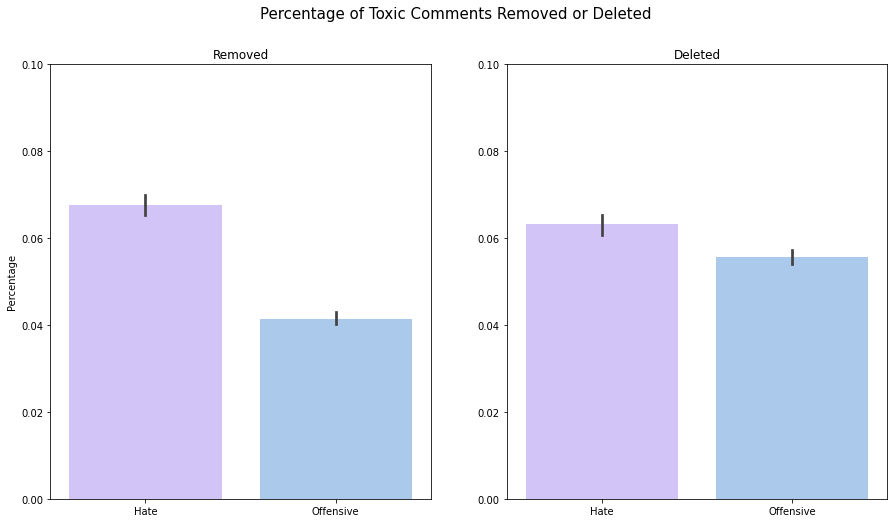

In [ ]:
modified_toxic_stats_df = modified_stats_df[(modified_stats_df['davidson_label'] == 0) | (modified_stats_df['davidson_label'] == 1)]

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Percentage of Toxic Comments Removed or Deleted', size=15)

sns.barplot(ax=axes[0], data=modified_toxic_stats_df, x='davidson_label',y='removed',palette=[colors[4],colors[0]]).set(ylim=[0,0.1],xticklabels=['Hate', 'Offensive'],xlabel=None,ylabel='Percentage',title='Removed')
sns.barplot(ax=axes[1], data=modified_toxic_stats_df, x='davidson_label', y='deleted',palette=[colors[4],colors[0]]).set(ylim=[0,0.1],xticklabels=['Hate', 'Offensive'],xlabel=None,ylabel=None,title='Deleted')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b22dad3f-c925-4cd0-bb81-e22d83bd774f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>